## **Developer Salary Estimator - Modeling**
##### **Author:** Topaz Montague
##### **Deliverable Description:** The goal of this Modeling Deliverable is to create a straightforward yet effective machine learning model to predict developer salaries using core factors like age, education level, years of coding experience, role type, and work experience. We’ll start by splitting the data into training and testing sets, focusing on key features, and training models like Linear Regression, Decision Tree, and Random Forest to strike a good balance between accuracy and simplicity. For evaluation, we’ll measure each model’s performance using metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE). The objective is to select a model that not only makes accurate predictions but also sheds light on the main drivers of developer compensation.

##### **Project Artifacts:**

GitHub Repository Link: [Developer Salary GitHub Repository](https://github.com/tfmontague/developer-salary-capstone)

Overleaf Project Report: [Developer Salary Overleaf Project Report](https://www.overleaf.com/read/kvnwjkgcfwkp#49128f)

Shiny App Dashboard: [Developer Salary Shiny App Dashboard - PLACEHOLDER](https://shiny.posit.co/py/)

#### **Data Preparation for Modeling**

##### Load the Necessary Libraries and Data

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the dataset
data_path = 'data/cleaned/Transformed_Developer_Survey_Data.csv'
data = pd.read_csv(data_path)

# Display the first few rows to confirm it’s loaded correctly
print(data.head())


   ResponseId  Age Range RemoteWork       EdLevel  YearsCode  \
0         390         30     Remote  Some college          7   
1         399         50     Remote  Some college         38   
2         417         40     Remote       Masters         21   
3         427         20     Remote     Bachelors          9   
4         429         30     Remote     Bachelors         20   

                                       DevType OrgSize  \
0                                      Student      15   
1                        Developer, full-stack    2500   
2                          Developer, back-end     250   
3  Developer, embedded applications or devices    2500   
4                   Engineer, site reliability     250   

                    Country                  ICorPM  WorkExp  ...  \
0  United States of America  Individual contributor        8  ...   
1  United States of America  Individual contributor       30  ...   
2                    Brazil  Individual contributor       1

##### Cleaning and Preparing the Data

In [14]:
# Step 1: Select Relevant Columns
selected_columns = ['TotalComp', 'Age Range', 'EdLevel', 'YearsCode', 'DevType', 'OrgSize', 'WorkExp', 'Industry']
data = data[selected_columns]

# Step 2: Handle Missing Values

# Drop rows where TotalComp is missing (since it's the target variable)
data = data.dropna(subset=['TotalComp'])

# Drop rows where TotalComp > 400000
data = data.drop(data[data['TotalComp'] > 400000].index)

# Handle missing values in other columns
# Check proportion of missing values
missing_values = data.isnull().mean()

# Drop or impute missing values based on proportion threshold
threshold = 0.1  # example threshold: if more than 10% of values are missing, drop the column; otherwise, drop rows
columns_to_drop = missing_values[missing_values > threshold].index
data = data.drop(columns=columns_to_drop)

# For columns with fewer missing values, drop rows with missing values
data = data.dropna()

# Step 3: Encode Categorical Variables

# List of categorical columns
categorical_columns = ['Age Range', 'EdLevel', 'DevType', 'Industry']

# Apply one-hot encoding for linear models or label encoding for tree-based models
use_one_hot = True  # Set this to False if using tree-based models

if use_one_hot:
    # Use OneHotEncoder for linear models
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
else:
    # Use LabelEncoder for tree-based models
    label_encoders = {}
    for column in categorical_columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le  # Store encoder for potential inverse transformation

# Display the prepared data
print(data.head())

   TotalComp  YearsCode OrgSize  WorkExp  Age Range_20  Age Range_30  \
0     110000          7      15        8         False          True   
1     195000         38    2500       30         False         False   
2     170000         21     250       17         False         False   
3      50000          9    2500        4          True         False   
4     230000         20     250       15         False          True   

   Age Range_40  Age Range_50  Age Range_60  Age Range_70  ...  \
0         False         False         False         False  ...   
1         False          True         False         False  ...   
2          True         False         False         False  ...   
3         False         False         False         False  ...   
4         False         False         False         False  ...   

   Industry_Healthcare  Industry_Higher Education  Industry_Insurance  \
0                False                      False               False   
1                 True  

##### Get Basic Information on the Featurers
Use hist() to look at the distribution of the selected features

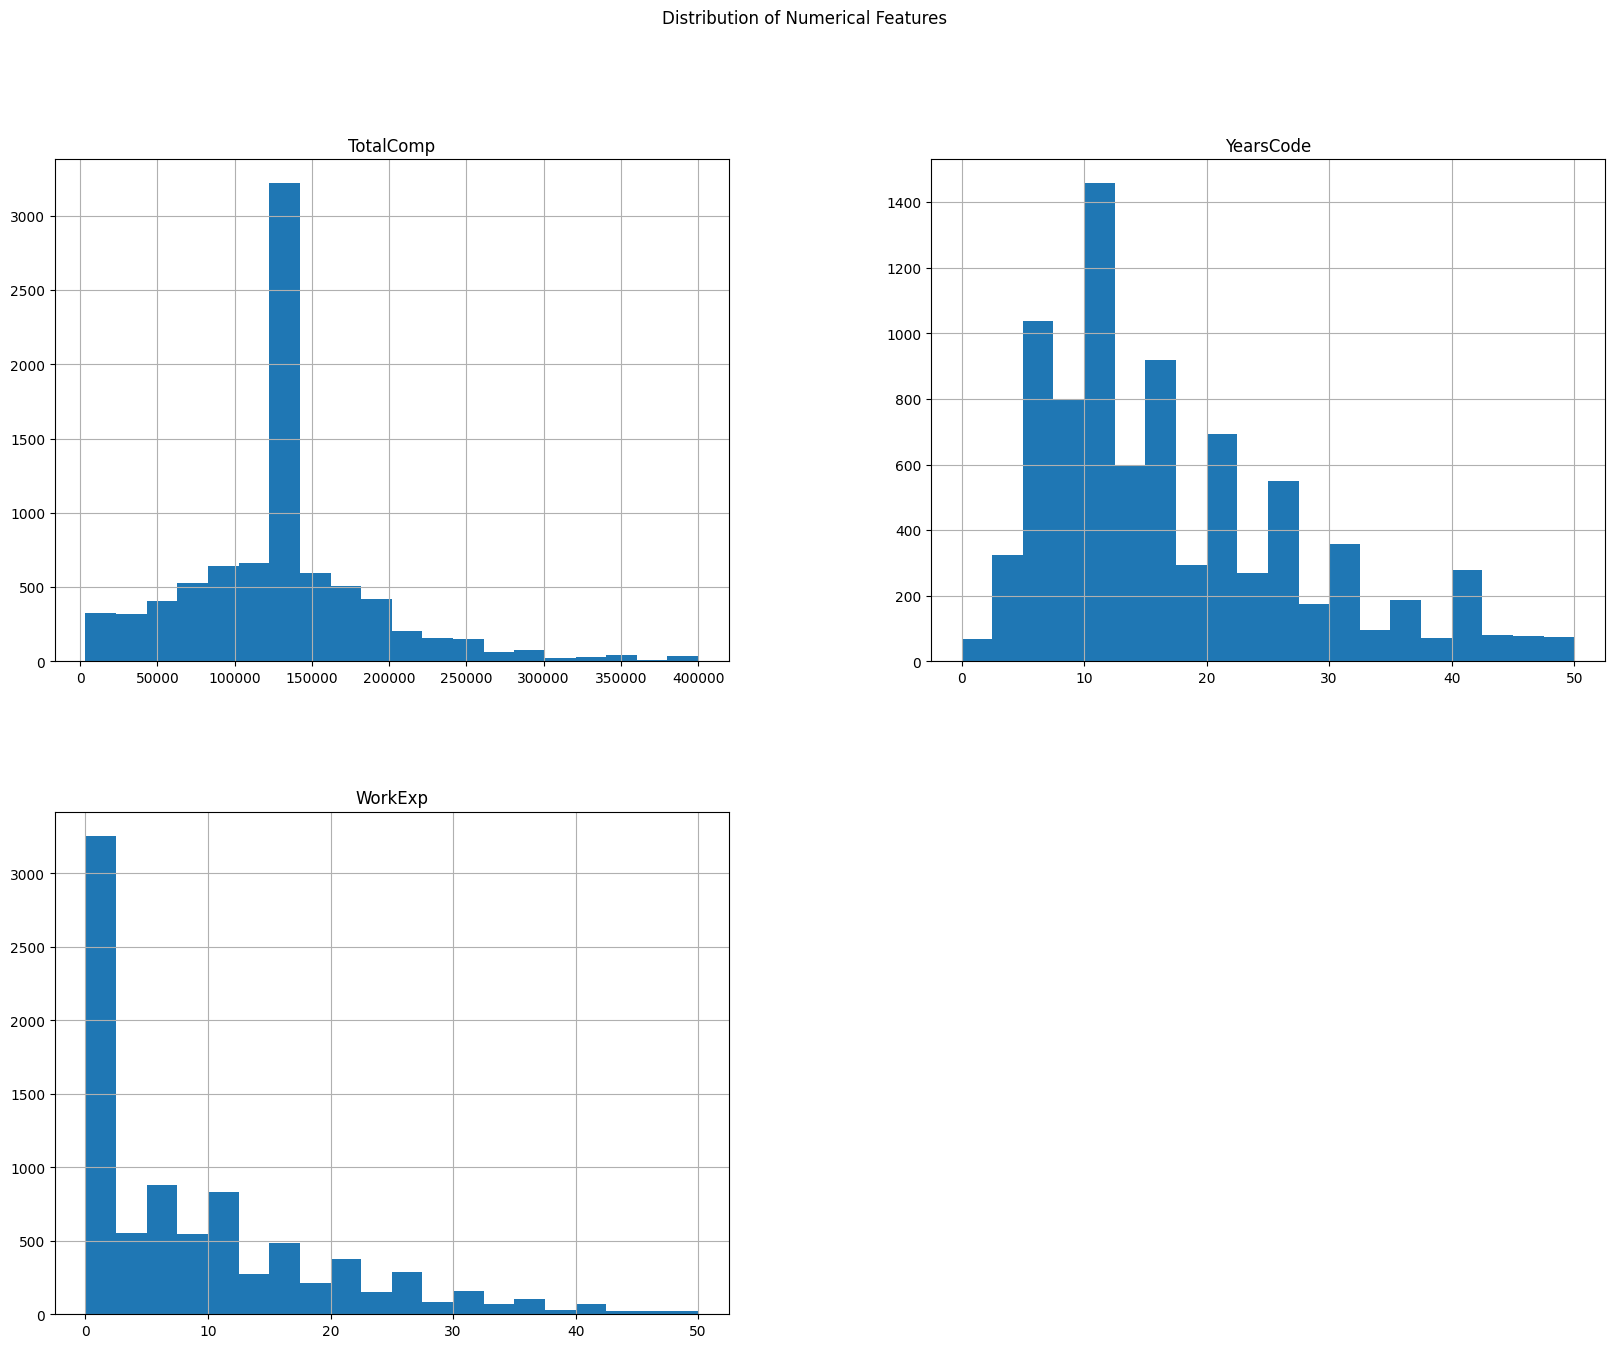

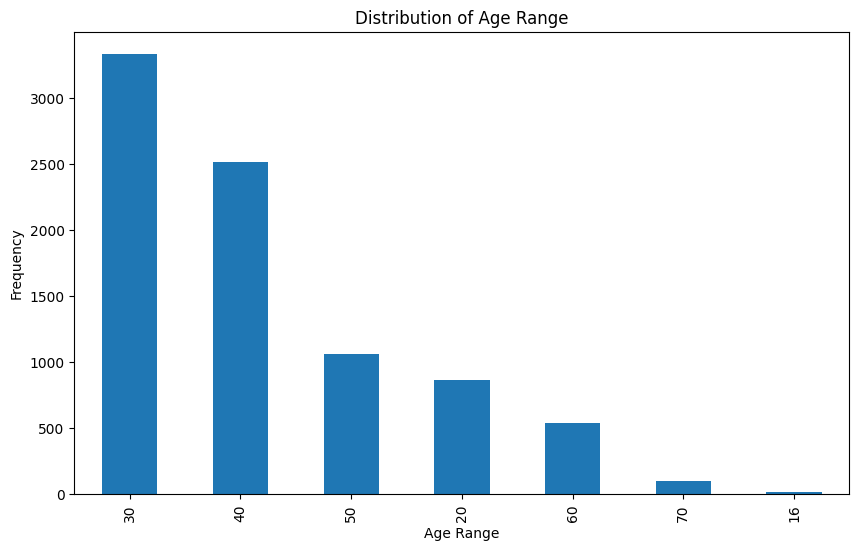

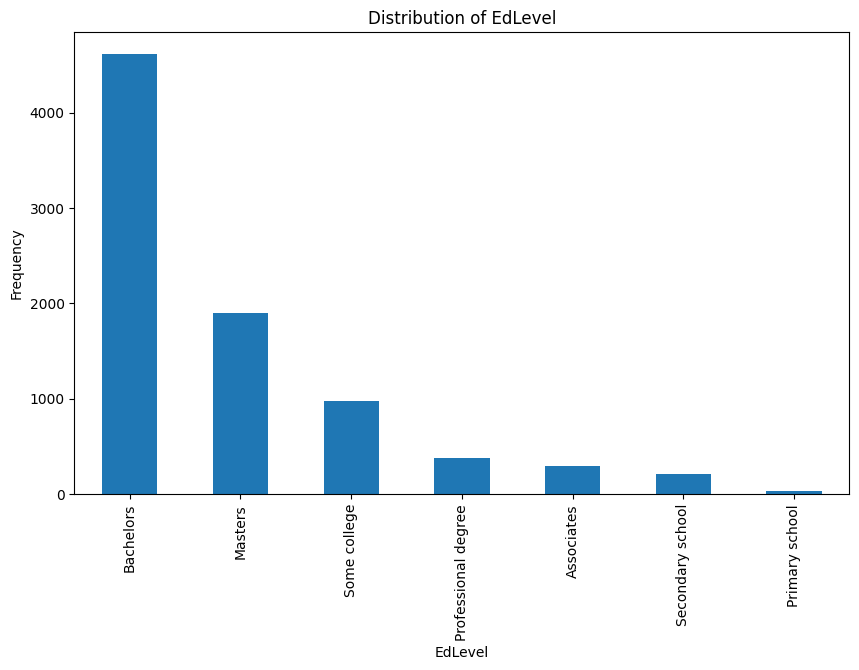

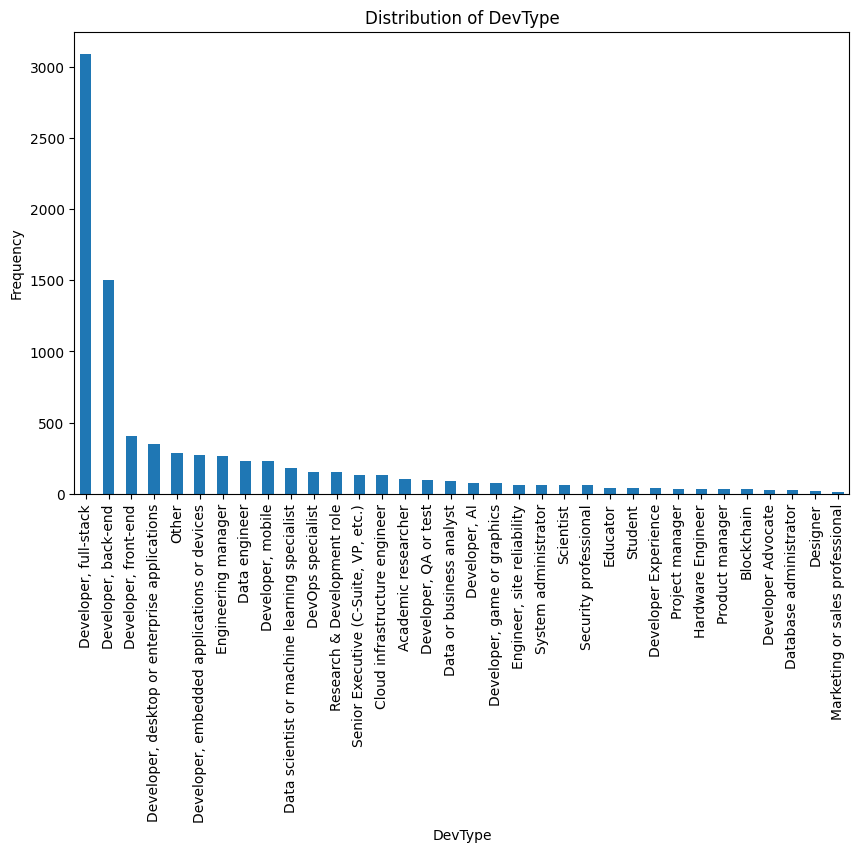

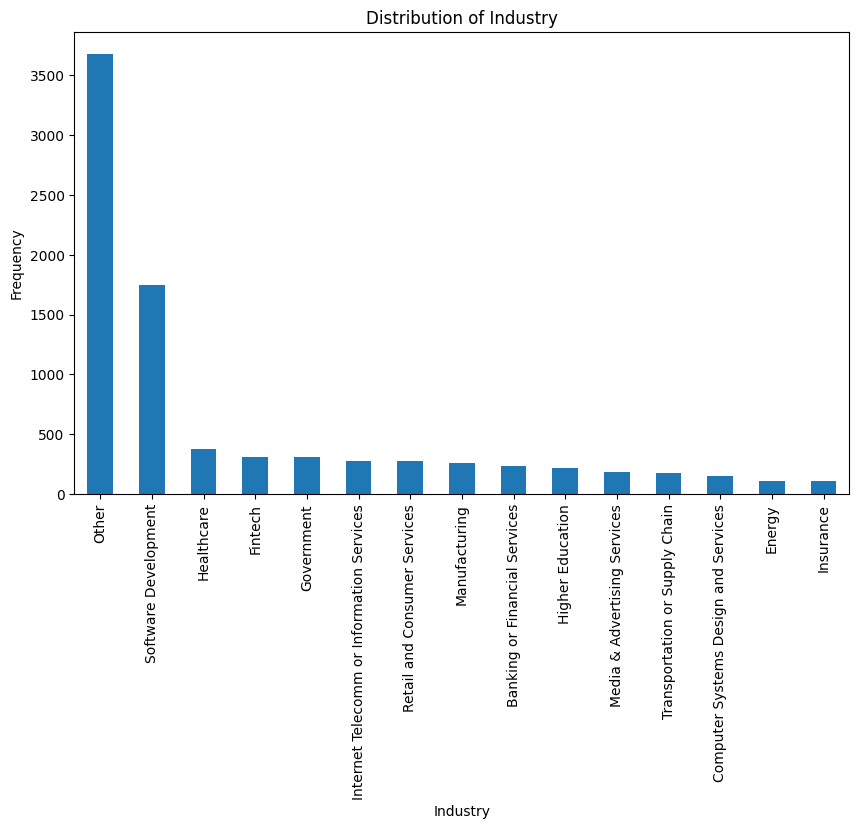

In [15]:
# Load the dataset
df = pd.read_csv('data/cleaned/Transformed_Developer_Survey_Data.csv')

# Select only the relevant columns
selected_columns = ["TotalComp", "Age Range", "EdLevel", "YearsCode", "DevType", "OrgSize", "WorkExp", "Industry"]
df = df[selected_columns]

# Separate numerical and categorical columns
numerical_columns = ["TotalComp", "YearsCode", "OrgSize", "WorkExp"]
categorical_columns = ["Age Range", "EdLevel", "DevType", "Industry"]

# Plot histograms for numerical features
df[numerical_columns].hist(bins=20, figsize=(20, 15))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Plot bar charts for categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



In [16]:
# Check that cleaning is good
df.head(n=10)

,TotalComp,Age Range,EdLevel,YearsCode,DevType,OrgSize,WorkExp,Industry
0,110000,30,Some college,7,Student,15,8,Transportation or Supply Chain
1,195000,50,Some college,38,"Developer, full-stack",2500,30,Healthcare
2,170000,40,Masters,21,"Developer, back-end",250,17,Other
3,50000,20,Bachelors,9,"Developer, embedded applications or devices",2500,4,Software Development
4,230000,30,Bachelors,20,"Engineer, site reliability",250,15,Software Development
5,85000,40,Bachelors,25,"Developer, full-stack",50,25,Retail and Consumer Services
6,160000,40,Secondary school,20,"Developer, full-stack",15,20,Software Development
7,110000,60,Bachelors,25,"Developer, front-end",2500,0,Other
8,190000,40,Masters,23,Engineering manager,10000,0,Other
9,115000,50,Associates,10,"Developer, full-stack",250,10,Other


#### **Plot to Visualize the Selected Features vs Total Compensation**

Total Compensation vs Age Range

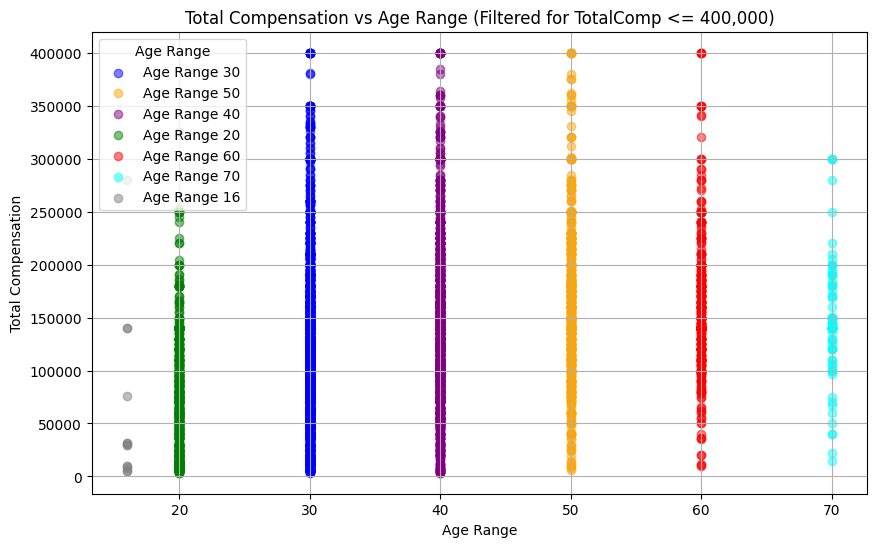

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/cleaned/Transformed_Developer_Survey_Data.csv'
data = pd.read_csv(file_path)

# Filter data to include only rows where TotalComp <= 400,000
data = data[data['TotalComp'] <= 400000]

# Define color mapping (specific to the column you're working with)
color_map = {
    20: 'green', 30: 'blue', 40: 'purple', 50: 'orange', 60: 'red', 70: 'cyan'
}

# Plotting example for TotalComp vs Age Range
plt.figure(figsize=(10, 6))

# Loop through unique age ranges to create separate scatter plots
for age_range in data['Age Range'].unique():
    subset = data[data['Age Range'] == age_range]
    plt.scatter(
        subset['Age Range'],
        subset['TotalComp'],
        c=color_map.get(age_range, 'grey'),  # Default to 'grey' if age_range not in color_map
        alpha=0.5,
        label=f'Age Range {age_range}'
    )

plt.title('Total Compensation vs Age Range (Filtered for TotalComp <= 400,000)')
plt.xlabel('Age Range')
plt.ylabel('Total Compensation')

# Set y-axis to display values in plain format (no scientific notation)
plt.ticklabel_format(style='plain', axis='y')

plt.legend(title='Age Range')
plt.grid(True)
plt.show()


Total Compensation vs Education Level

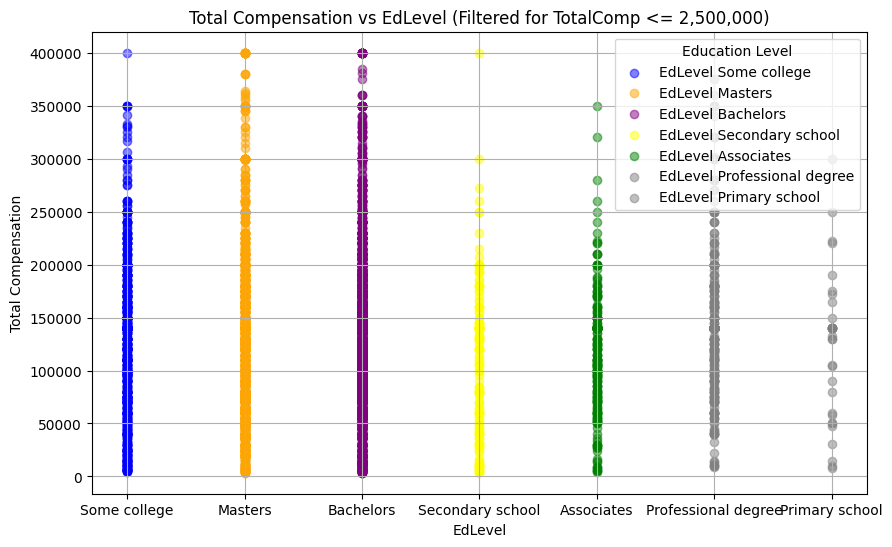

In [18]:
# Define color mapping for EdLevel
color_map = {
    'High school': 'green', 'Some college': 'blue', 'Bachelors': 'purple',
    'Masters': 'orange', 'Doctorate': 'red', 'Secondary school': 'yellow', 'Associates': 'green', 'Professional Degree': 'purple'
}

plt.figure(figsize=(10, 6))
for ed_level in data['EdLevel'].unique():
    subset = data[data['EdLevel'] == ed_level]
    plt.scatter(
        subset['EdLevel'],
        subset['TotalComp'],
        c=color_map.get(ed_level, 'grey'),
        alpha=0.5,
        label=f'EdLevel {ed_level}'
    )

plt.title('Total Compensation vs EdLevel (Filtered for TotalComp <= 2,500,000)')
plt.xlabel('EdLevel')
plt.ylabel('Total Compensation')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Education Level')
plt.grid(True)
plt.show()


Total Compensation vs Years of Coding Experience

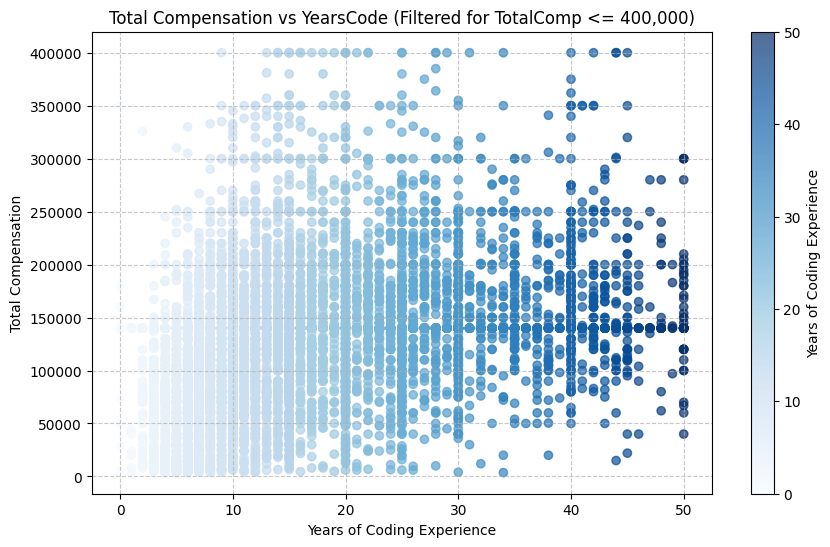

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load the dataset
file_path = 'data/cleaned/Transformed_Developer_Survey_Data.csv'
data = pd.read_csv(file_path)

# Filter dataset to only include TotalComp <= 400,000
filtered_data = data[data['TotalComp'] <= 400000]

# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Normalize the YearsCode data for the color map
norm = plt.Normalize(filtered_data['YearsCode'].min(), filtered_data['YearsCode'].max())
colors = cm.Blues(norm(filtered_data['YearsCode']))

# Plotting TotalComp vs YearsCode with a gradient blue color based on YearsCode
scatter = ax.scatter(
    filtered_data['YearsCode'],
    filtered_data['TotalComp'],
    c=filtered_data['YearsCode'],
    cmap='Blues',
    alpha=0.7
)

# Add color bar to indicate the gradient scale of YearsCode
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Years of Coding Experience')

# Set titles and labels
ax.set_title('Total Compensation vs YearsCode (Filtered for TotalComp <= 400,000)')
ax.set_xlabel('Years of Coding Experience')
ax.set_ylabel('Total Compensation')

# Display y-axis in plain format without scientific notation
ax.ticklabel_format(style='plain', axis='y')

# Add grid for readability
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()



Total Compensation vs Type of Developer

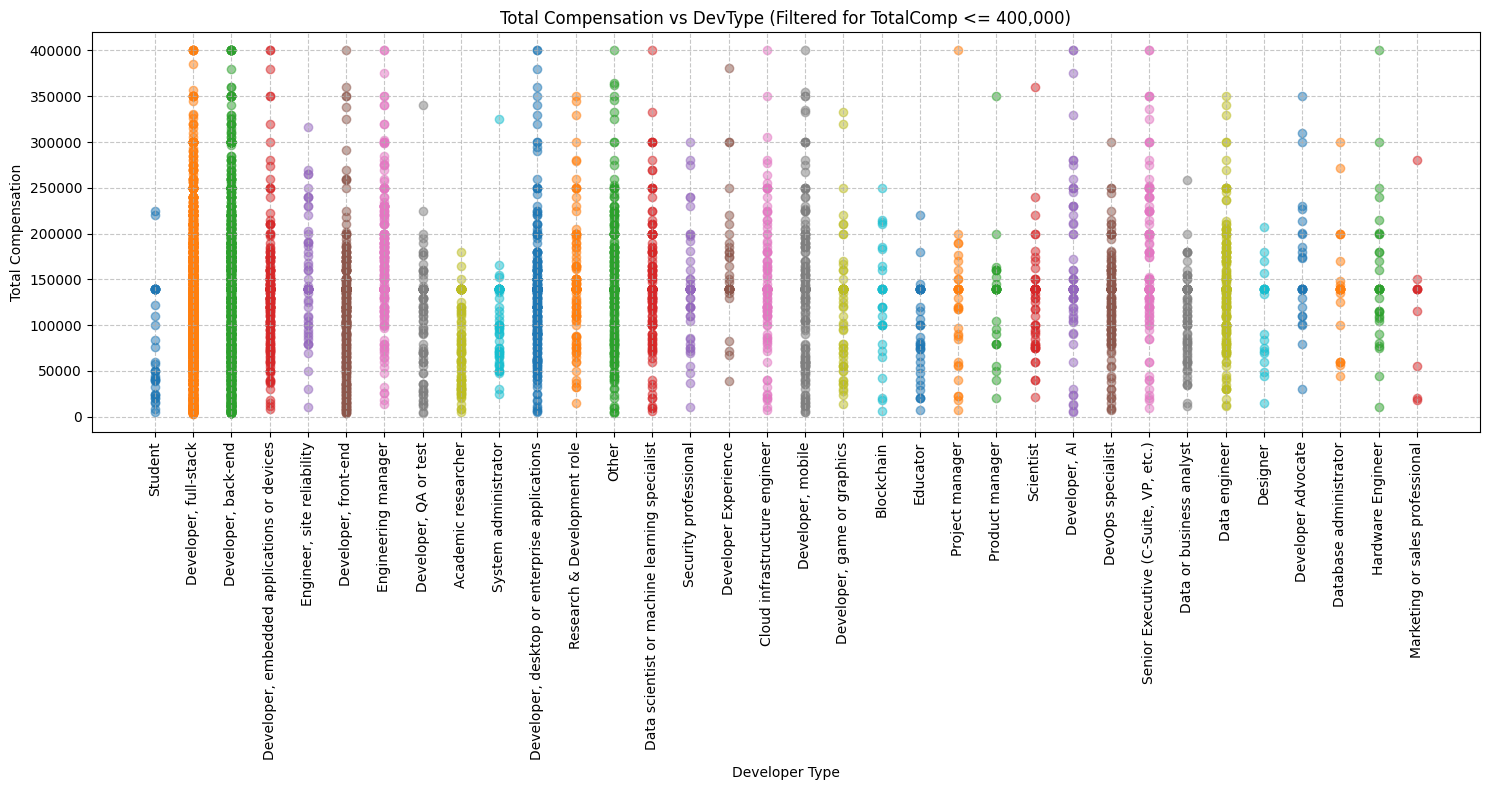

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/cleaned/Transformed_Developer_Survey_Data.csv'
data = pd.read_csv(file_path)

# Filter dataset to only include TotalComp <= 400,000
filtered_data = data[data['TotalComp'] <= 400000]

# Define figure with adjusted width
plt.figure(figsize=(15, 8))

# Plotting TotalComp vs DevType with appropriate adjustments for readability
for dev_type in filtered_data['DevType'].unique():
    subset = filtered_data[filtered_data['DevType'] == dev_type]
    plt.scatter(
        subset['DevType'],
        subset['TotalComp'],
        alpha=0.5,
        label=f'DevType {dev_type}'
    )

# Title and labels
plt.title('Total Compensation vs DevType (Filtered for TotalComp <= 400,000)')
plt.xlabel('Developer Type')
plt.ylabel('Total Compensation')

# Display y-axis in plain format without scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()


Total Compensation vs Organization Size

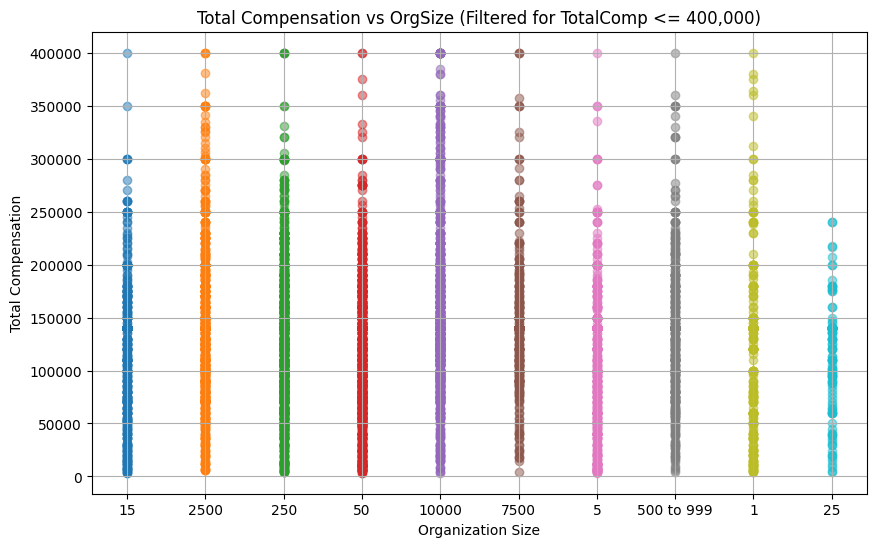

In [21]:
plt.figure(figsize=(10, 6))
for org_size in filtered_data['OrgSize'].unique():
    subset = filtered_data[filtered_data['OrgSize'] == org_size]
    plt.scatter(
        subset['OrgSize'],
        subset['TotalComp'],
        alpha=0.5,
        label=f'OrgSize {org_size}'
    )

plt.title('Total Compensation vs OrgSize (Filtered for TotalComp <= 400,000)')
plt.xlabel('Organization Size')
plt.ylabel('Total Compensation')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()


#### **Declare the Train-Test Split**

In [22]:
# Use train_test_split from sklearn.model_selection to split the data into training and testing sets. A typical split is 80% for training and 20% for testing:
from sklearn.model_selection import train_test_split

# Filter data to include only rows where TotalComp <= 400000
filtered_data = data[data['TotalComp'] <= 400000]

# Define features and target
X = filtered_data[['Age Range', 'EdLevel', 'YearsCode', 'DevType', 'OrgSize', 'WorkExp', 'Industry']]
y = filtered_data['TotalComp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### **Model Training and Evaluation**

Linear Regression Model
Purpose: Linear Regression serves as a baseline model to understand general salary trends.

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('data/cleaned/Transformed_Developer_Survey_Data.csv')

# Filter data to include only rows where TotalComp <= 400000
data = data[data['TotalComp'] <= 400000]

# Select relevant columns
selected_columns = ['TotalComp', 'Age Range', 'EdLevel', 'YearsCode', 'DevType', 'OrgSize', 'WorkExp', 'Industry']
data = data[selected_columns]

# Handle missing values (drop rows with missing values for simplicity)
data = data.dropna()

# One-hot encode categorical variables (including 'OrgSize')
data = pd.get_dummies(data, columns=['Age Range', 'EdLevel', 'DevType', 'OrgSize', 'Industry'], drop_first=True)

# Define features and target
X = data.drop('TotalComp', axis=1)
y = data['TotalComp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_train_lr = linear_model.predict(X_train)
y_pred_test_lr = linear_model.predict(X_test)

# Display evaluation metrics for Linear Regression
print("Linear Regression - Training Set:")
print("MAE:", mean_absolute_error(y_train, y_pred_train_lr))
print("MSE:", mean_squared_error(y_train, y_pred_train_lr))
print("R^2:", r2_score(y_train, y_pred_train_lr))

print("\nLinear Regression - Test Set:")
print("MAE:", mean_absolute_error(y_test, y_pred_test_lr))
print("MSE:", mean_squared_error(y_test, y_pred_test_lr))
print("R^2:", r2_score(y_test, y_pred_test_lr))

Linear Regression - Training Set:
MAE: 39655.81580174313
MSE: 2933477602.9024425
R^2: 0.20656017856959663

Linear Regression - Test Set:
MAE: 41487.11481678698
MSE: 3243122526.822035
R^2: 0.19654005605061176


Linear Regression Model Graph for Total Compensation Predictions vs Actuals

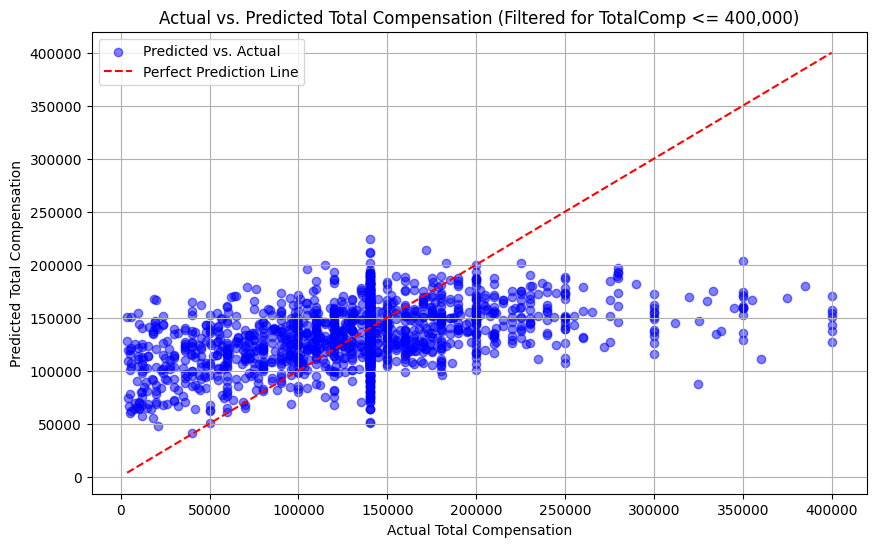

In [25]:
import matplotlib.pyplot as plt

# Filter the data for TotalComp <= 400000
y_test_filtered = y_test[y_test <= 400000]
y_pred_filtered = y_pred_test_lr[y_test <= 400000]  # Apply the same mask to y_pred

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5, color='blue', label='Predicted vs. Actual')
plt.plot([y_test_filtered.min(), y_test_filtered.max()], 
         [y_test_filtered.min(), y_test_filtered.max()], 
         color='red', linestyle='--', label='Perfect Prediction Line')

# Labeling the plot
plt.xlabel("Actual Total Compensation")
plt.ylabel("Predicted Total Compensation")
plt.title("Actual vs. Predicted Total Compensation (Filtered for TotalComp <= 400,000)")
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # Avoid scientific notation on the y-axis
plt.show()


Decision Tree Model
Purpose: Decision Tree model is used to capture non-linear relationships within the data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = 'data/cleaned/Transformed_Developer_Survey_Data.csv'
data = pd.read_csv(file_path)

# Filter data to include only rows where TotalComp <= 400000
data = data[data['TotalComp'] <= 400000]

# Select relevant columns
selected_columns = ['TotalComp', 'Age Range', 'EdLevel', 'YearsCode', 'DevType', 'OrgSize', 'WorkExp', 'Industry']
data = data[selected_columns]

# Handle missing values
data = data.dropna(subset=['TotalComp'])  # Drop rows with missing TotalComp values
data = data.dropna()  # Drop rows with missing values in other columns

# Encode categorical variables
categorical_columns = ['Age Range', 'EdLevel', 'DevType', 'OrgSize', 'Industry']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define features and target
X = data.drop('TotalComp', axis=1)
y = data['TotalComp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_train_tree = tree_model.predict(X_train)
y_pred_test_tree = tree_model.predict(X_test)

# Display evaluation metrics for Decision Tree
print("Decision Tree - Training Set:")
print("MAE:", mean_absolute_error(y_train, y_pred_train_tree))
print("MSE:", mean_squared_error(y_train, y_pred_train_tree))
print("R^2:", r2_score(y_train, y_pred_train_tree))

print("\nDecision Tree - Test Set:")
print("MAE:", mean_absolute_error(y_test, y_pred_test_tree))
print("MSE:", mean_squared_error(y_test, y_pred_test_tree))
print("R^2:", r2_score(y_test, y_pred_test_tree))

Decision Tree - Training Set:
MAE: 2264.7331600316893
MSE: 110949208.98757304
R^2: 0.9699907302923177

Decision Tree - Test Set:
MAE: 60327.253656967536
MSE: 6833384163.111126
R^2: -0.6929210695156642


Decision Tree Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and initialize GridSearchCV
tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_params, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on training data
grid_search_tree.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search_tree.best_params_)

# Train the model with best parameters
best_tree_model = grid_search_tree.best_estimator_
best_tree_model.fit(X_train, y_train)

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}


DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [ ]:
# Predict and evaluate using the best-fitted Decision Tree model
y_pred_train_tree = best_tree_model.predict(X_train)
y_pred_test_tree = best_tree_model.predict(X_test)

# Display evaluation metrics for Decision Tree with best parameters
print("Decision Tree (Best Parameters) - Training Set:")
print("MAE:", mean_absolute_error(y_train, y_pred_train_tree))
print("MSE:", mean_squared_error(y_train, y_pred_train_tree))
print("R^2:", r2_score(y_train, y_pred_train_tree))

print("\nDecision Tree (Best Parameters) - Test Set:")
print("MAE:", mean_absolute_error(y_test, y_pred_test_tree))
print("MSE:", mean_squared_error(y_test, y_pred_test_tree))
print("R^2:", r2_score(y_test, y_pred_test_tree))


Decision Tree (Best Parameters) - Training Set:
MAE: 36528.32485748898
MSE: 2523174533.6249337
R^2: 0.3175379456054813

Decision Tree (Best Parameters) - Test Set:
MAE: 44450.87817913356
MSE: 3764948444.212115
R^2: 0.06726149229914768


Decision Tree Regressor Model Graph for Total Compensation Predictions vs Actuals

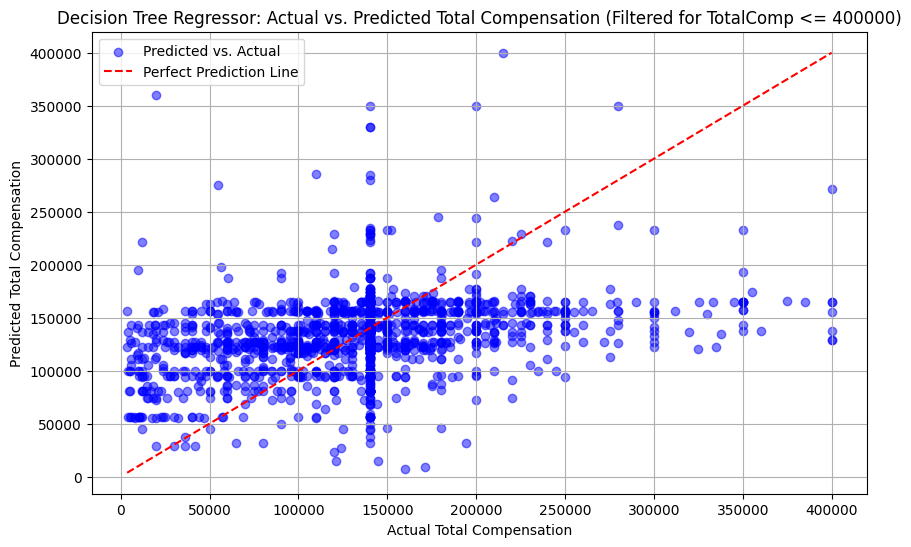

In [ ]:
# Generate predictions using the best-fitted DecisionTreeRegressor
y_pred_best_tree = best_tree_model.predict(X_test)

# Filter the data for TotalComp <= 400000
y_test_filtered = y_test[y_test <= 400000]
y_pred_filtered = y_pred_best_tree[y_test <= 400000]  # Apply the same mask to y_pred_best_tree

# Visualize Actual vs Predicted TotalComp for values <= 400000
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5, color='blue', label='Predicted vs. Actual')
plt.plot([y_test_filtered.min(), y_test_filtered.max()],
         [y_test_filtered.min(), y_test_filtered.max()],
         color='red', linestyle='--', label='Perfect Prediction Line')

# Labeling the plot
plt.xlabel("Actual Total Compensation")
plt.ylabel("Predicted Total Compensation")
plt.title("Decision Tree Regressor: Actual vs. Predicted Total Compensation (Filtered for TotalComp <= 400000)")
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.show()



Random Forest Model
Purpose: Random Forest model helps to capture complex relationships in the data by using multiple decision trees.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = 'data/cleaned/Transformed_Developer_Survey_Data.csv'
data = pd.read_csv(file_path)

# Filter data to include only rows where TotalComp <= 400000
data = data[data['TotalComp'] <= 400000]

# Select relevant columns
selected_columns = ['TotalComp', 'Age Range', 'EdLevel', 'YearsCode', 'DevType', 'OrgSize', 'WorkExp', 'Industry']
data = data[selected_columns]

# Handle missing values (drop rows with missing values for simplicity)
data = data.dropna()

# Encode categorical variables
categorical_columns = ['Age Range', 'EdLevel', 'DevType', 'OrgSize', 'Industry']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define features and target
X = data.drop('TotalComp', axis=1)
y = data['TotalComp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_train_forest = forest_model.predict(X_train)
y_pred_test_forest = forest_model.predict(X_test)

# Display evaluation metrics for Random Forest
print("Random Forest - Training Set:")
print("MAE:", mean_absolute_error(y_train, y_pred_train_forest))
print("MSE:", mean_squared_error(y_train, y_pred_train_forest))
print("R^2:", r2_score(y_train, y_pred_train_forest))

print("\nRandom Forest - Test Set:")
print("MAE:", mean_absolute_error(y_test, y_pred_test_forest))
print("MSE:", mean_squared_error(y_test, y_pred_test_forest))
print("R^2:", r2_score(y_test, y_pred_test_forest))

Random Forest - Training Set:
MAE: 16943.501493983076
MSE: 554659110.7271825
R^2: 0.8499771652135031

Random Forest - Test Set:
MAE: 45342.22948174411
MSE: 3782466515.6126447
R^2: 0.06292151792285938


Random Forest Hyperparameter Tuning using GridSearchCV

In [ ]:
forest_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_forest = GridSearchCV(RandomForestRegressor(random_state=42), forest_params, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on training data
grid_search_forest.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_forest.best_params_)

# Train the model with best parameters
best_forest_model = grid_search_forest.best_estimator_
best_forest_model.fit(X_train, y_train)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [ ]:
# Predict and evaluate using the best-fitted Random Forest model
y_pred_train_forest = best_forest_model.predict(X_train)
y_pred_test_forest = best_forest_model.predict(X_test)

# Display evaluation metrics for Random Forest with best parameters
print("Random Forest (Best Parameters) - Training Set:")
print("MAE:", mean_absolute_error(y_train, y_pred_train_forest))
print("MSE:", mean_squared_error(y_train, y_pred_train_forest))
print("R^2:", r2_score(y_train, y_pred_train_forest))

print("\nRandom Forest (Best Parameters) - Test Set:")
print("MAE:", mean_absolute_error(y_test, y_pred_test_forest))
print("MSE:", mean_squared_error(y_test, y_pred_test_forest))
print("R^2:", r2_score(y_test, y_pred_test_forest))


Random Forest (Best Parameters) - Training Set:
MAE: 35612.18372088513
MSE: 2355704169.275906
R^2: 0.3628349186767962

Random Forest (Best Parameters) - Test Set:
MAE: 41468.25971176507
MSE: 3254045421.133507
R^2: 0.19383398867921953


Random Forest Regressor Model Graph for Total Compensation Predictions vs Actuals

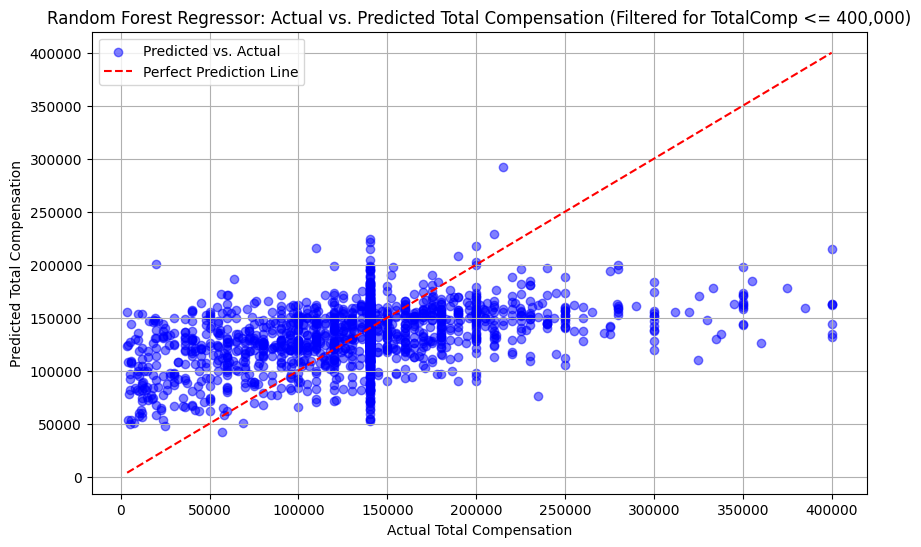

In [ ]:
import matplotlib.pyplot as plt

# Filter to only include TotalComp values <= 400,000
y_test_filtered = y_test[y_test <= 400000]
y_pred_filtered = y_pred[y_test <= 400000]  # Apply the same mask to y_pred

# Use predictions from the best_forest_model with filtered TotalComp values
y_test_filtered = y_test[y_test <= 400000]
y_pred_filtered = best_forest_model.predict(X_test[y_test <= 400000])  # Apply the best model to the filtered test set

# Visualize Actual vs Predicted TotalComp (Filtered for <= 400,000)
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5, color='blue', label='Predicted vs. Actual')

# Plot a perfect prediction line
plt.plot([y_test_filtered.min(), y_test_filtered.max()], [y_test_filtered.min(), y_test_filtered.max()], 
         color='red', linestyle='--', label='Perfect Prediction Line')

# Labeling the plot
plt.xlabel("Actual Total Compensation")
plt.ylabel("Predicted Total Compensation")
plt.title("Random Forest Regressor: Actual vs. Predicted Total Compensation (Filtered for TotalComp <= 400,000)")
plt.legend()
plt.grid(True)

# Set y-axis to display values in plain format (no scientific notation)
plt.ticklabel_format(style='plain', axis='both')
plt.show()

#### **Model Comparison**

In [ ]:
import pandas as pd
from tabulate import tabulate

# Define the evaluation metrics for each model
data = {
    "Model": [
        "Linear Regression - Baseline", "Linear Regression - Best Fit",
        "Decision Tree Regressor - Baseline", "Decision Tree Regressor - Best Fit",
        "Random Forest Regressor - Baseline", "Random Forest Regressor - Best Fit"
    ],
    "Training MAE": [
        39655.82, 36528.32, 2264.73, 36528.32, 16943.50, 35612.18
    ],
    "Training MSE": [
        2933477602.90, 2523174533.62, 110949208.99, 2523174533.62, 554659110.73, 2355704169.28
    ],
    "Training R² Score": [
        0.21, 0.32, 0.97, 0.32, 0.85, 0.36
    ],
    "Test MAE": [
        41487.11, 44450.88, 60327.25, 44450.88, 45342.23, 41468.26
    ],
    "Test MSE": [
        3243122526.82, 3764948444.21, 6833384163.11, 3764948444.21, 3782466515.61, 3254045421.13
    ],
    "Test R² Score": [
        0.20, 0.07, -0.69, 0.07, 0.06, 0.19
    ]
}

# Create a DataFrame for the results
results_df = pd.DataFrame(data)

# Display the table with visible borders
print(tabulate(results_df, headers='keys', tablefmt="grid", showindex=False))


+------------------------------------+----------------+----------------+---------------------+------------+-------------+-----------------+
| Model                              |   Training MAE |   Training MSE |   Training R² Score |   Test MAE |    Test MSE |   Test R² Score |
+====================================+================+================+=====================+============+=============+=================+
| Linear Regression - Baseline       |       39655.8  |    2.93348e+09 |                0.21 |    41487.1 | 3.24312e+09 |            0.2  |
+------------------------------------+----------------+----------------+---------------------+------------+-------------+-----------------+
| Linear Regression - Best Fit       |       36528.3  |    2.52317e+09 |                0.32 |    44450.9 | 3.76495e+09 |            0.07 |
+------------------------------------+----------------+----------------+---------------------+------------+-------------+-----------------+
| Decision Tree Regr

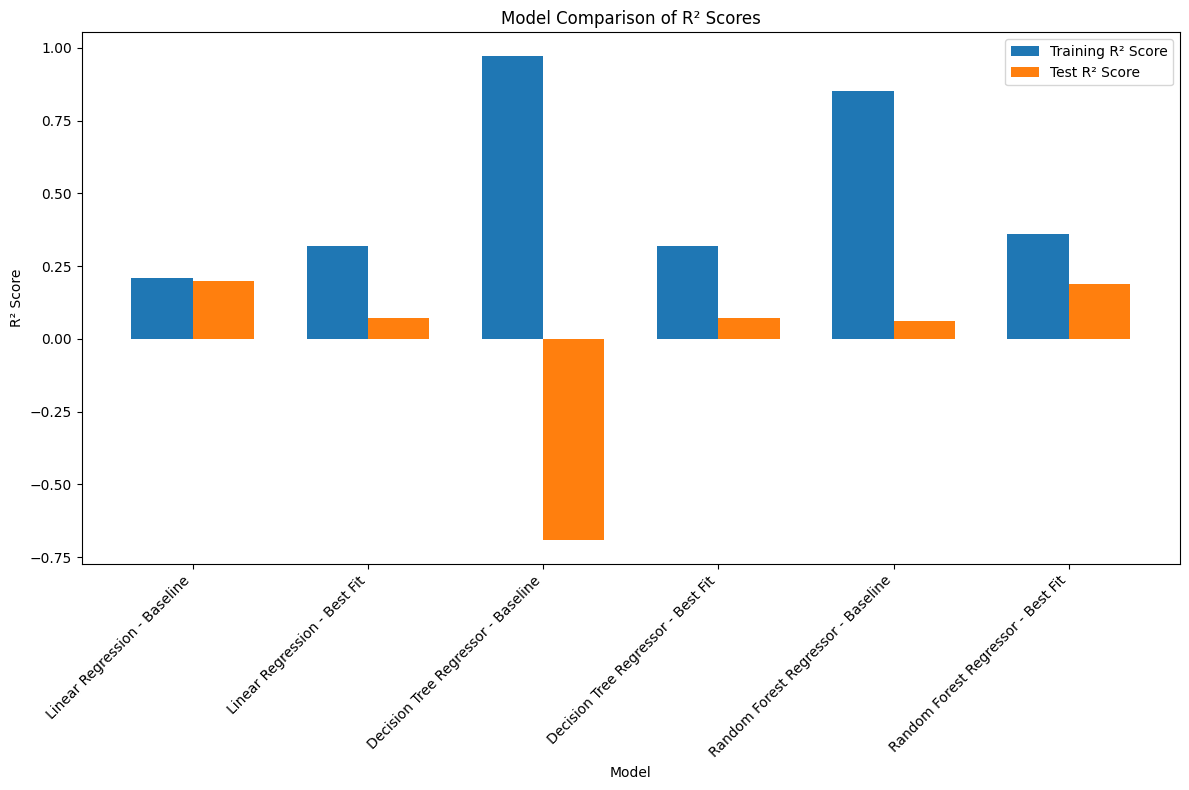

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the evaluation metrics for each model
data = {
    "Model": [
        "Linear Regression - Baseline", "Linear Regression - Best Fit",
        "Decision Tree Regressor - Baseline", "Decision Tree Regressor - Best Fit",
        "Random Forest Regressor - Baseline", "Random Forest Regressor - Best Fit"
    ],
    "Training MAE": [39655.82, 36528.32, 2264.73, 36528.32, 16943.50, 35612.18],
    "Training MSE": [2933477602.90, 2523174533.62, 110949208.99, 2523174533.62, 554659110.73, 2355704169.28],
    "Training R² Score": [0.21, 0.32, 0.97, 0.32, 0.85, 0.36],
    "Test MAE": [41487.11, 44450.88, 60327.25, 44450.88, 45342.23, 41468.26],
    "Test MSE": [3243122526.82, 3764948444.21, 6833384163.11, 3764948444.21, 3782466515.61, 3254045421.13],
    "Test R² Score": [0.20, 0.07, -0.69, 0.07, 0.06, 0.19]
}

# Convert the data to a DataFrame
results_df = pd.DataFrame(data)

# Plotting the comparison of models based on R² Score for Training and Test sets
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width for spacing
bar_width = 0.35
index = range(len(results_df))

# Plot Training and Test R² Scores side by side
ax.bar(index, results_df["Training R² Score"], bar_width, label='Training R² Score')
ax.bar([i + bar_width for i in index], results_df["Test R² Score"], bar_width, label='Test R² Score')

# Set plot labels and titles
ax.set_xlabel('Model')
ax.set_ylabel('R² Score')
ax.set_title('Model Comparison of R² Scores')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(results_df['Model'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


#### **Model Selection**

The Random Forest Regressor - Best Fit model stands out as the strongest performer based on the evaluation metrics. It has a relatively low Mean Absolute Error (MAE) and Mean Squared Error (MSE) on both the training and test sets, indicating that its predictions are generally close to actual salary values. The low MSE on the test set is particularly encouraging, as it suggests fewer large errors, which is essential for building a reliable salary prediction tool. The model’s positive R² score of 0.19 on the test set also shows that it explains a reasonable amount of the variation in salaries—an improvement over models like the baseline Decision Tree, which struggled with negative R² scores on the test set. This suggests that the Random Forest model generalizes well and doesn’t suffer from overfitting to the training data.

Choosing the Random Forest Regressor - Best Fit model makes sense because it strikes a good balance between performance on the training and test sets. Unlike the Decision Tree model, which tended to overfit, the Random Forest’s ensemble approach provides more stability and consistent accuracy. This balance, along with lower prediction errors, makes the Random Forest model a solid choice for a real-world salary estimation tool. Given these results, it offers a strong foundation for accurate and reliable predictions, aligning well with the project’s goal of creating an effective salary estimator application.

#### **Conclusion**

The objective of this project was to develop a predictive model capable of estimating developer salaries based on factors like experience, education level, job role, and company size. Through data cleaning, exploratory data analysis, and rigorous model training, we identified the Random Forest Regressor as the most reliable model. This model offers an effective balance between accuracy and flexibility, making it well-suited for real-world applications in a salary estimation dashboard.

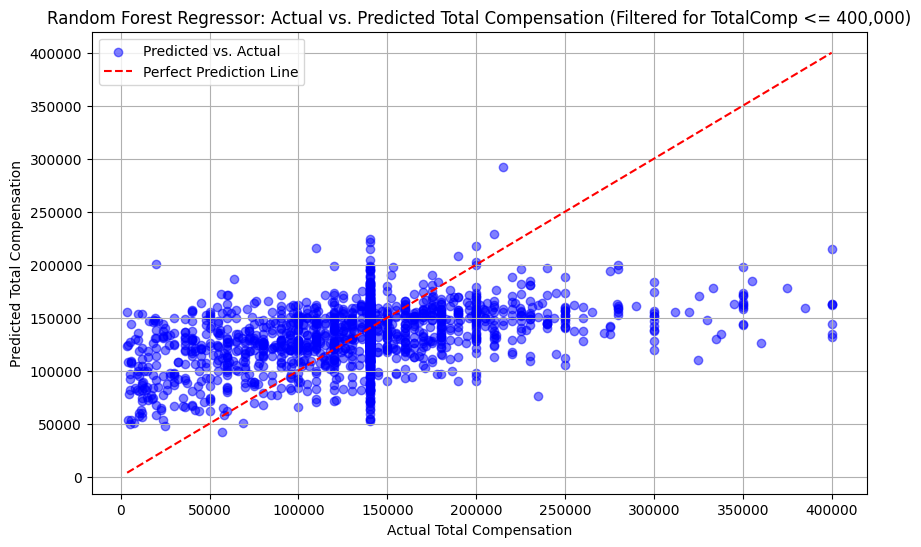

In [ ]:
import matplotlib.pyplot as plt

# Apply the best model parameters obtained from GridSearchCV to generate predictions
y_test_filtered = y_test[y_test <= 400000]
y_pred_filtered = best_forest_model.predict(X_test[y_test <= 400000])  # Apply the best model to the filtered test set

# Visualize Actual vs Predicted Total Compensation for values <= 400,000
plt.figure(figsize=(10, 6))
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5, color='blue', label='Predicted vs. Actual')

# Plot a perfect prediction line
plt.plot([y_test_filtered.min(), y_test_filtered.max()], [y_test_filtered.min(), y_test_filtered.max()],
         color='red', linestyle='--', label='Perfect Prediction Line')

# Labeling the plot
plt.xlabel("Actual Total Compensation")
plt.ylabel("Predicted Total Compensation")
plt.title("Random Forest Regressor: Actual vs. Predicted Total Compensation (Filtered for TotalComp <= 400,000)")
plt.legend()
plt.grid(True)

# Set y-axis to display values in plain format (no scientific notation)
plt.ticklabel_format(style='plain', axis='both')
plt.show()

#### **Key Findings**
- Experience and Education Impact: Years of coding experience and higher education levels are correlated with higher salaries.
- Company Size and Industry Differences: Developers in larger companies or high-demand industries (e.g., cloud computing) tend to report higher compensation.
- Regional Variability: States like California and Washington show higher average salaries, likely due to cost-of-living differences and regional demand for tech talent.

#### **Insights**
- Outliers in High Salaries: The data revealed many high-salary outliers, >$400,000 USD, likely representing senior or specialized positions. Filtering these improved model performance.
- Feature Interactions: Random Forest captured important interactions, making it an effective choice for understanding how education and experience jointly influence salaries.